In [1]:
# Stock Market Analysis and Prediction using LSTM, by Rahul Kumar

# all the required libraries are uploaded
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf 
%matplotlib inline
plt.style.use('Solarize_Light2')  # settings plt style to "solarize light 2"
sns.set_style('whitegrid')    # settings sns style to "whitegrid"
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr 
from datetime import datetime
yf.pdr_override()

## 1. Getting the necessary data:

In [2]:
techno_list=['AAPL','GOOG','AMZN','NVDA']   # these are the tech stocks adding into list 
end=datetime.now()   # present day,month and year, for eg: 1/02/2023
start=datetime(end.year-1,end.month,end.day)   # from previous year, same month and day as of now, 1/02/2022

for stock in techno_list: 
    globals()[stock]=yf.download(stock,start,end)
    
company_list=[AAPL,GOOG,AMZN,NVDA]            # tech stocks list, already mentioned 
company_name=['APPLE','GOOGLE','AMAZON','NVIDIA'] # list containing the name of the tech stocks

for company,comp_name in zip(company_list,company_name):
    company["company_name"]=comp_name

df=pd.concat(company_list,axis=0)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:

df.head()


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-02-22,164.979996,166.690002,162.149994,164.320007,163.330612,91162800,APPLE
2022-02-23,165.539993,166.149994,159.750000,160.070007,159.106186,90009200,APPLE
2022-02-24,152.580002,162.850006,152.000000,162.740005,161.760117,141147500,APPLE
2022-02-25,163.839996,165.119995,160.869995,164.850006,163.857407,91974200,APPLE
2022-02-28,163.059998,165.419998,162.429993,165.119995,164.125763,95056600,APPLE


## 2. Getting the summary statistics as well as info of the apple tech stocks:

In [4]:
# we successfully managed to get the data which contains open,high,low,close,adj close, volume, company_name, date

AAPL.describe()  # summary statistics of apple stocks 



,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,150.814223,152.965498,148.838088,151.001434,150.449062,8.492244e+07
std,12.242347,12.162672,12.248293,12.255361,12.073828,2.349644e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,141.973427,6.913640e+07
50%,149.460007,151.470001,147.820007,150.179993,149.811249,7.972480e+07
75%,160.150002,162.865005,157.440002,159.534996,158.574409,9.374540e+07
max,178.550003,179.610001,176.699997,178.960007,177.882462,1.826020e+08


In [5]:
AAPL.info() # total no.of records under apple stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-02-22 to 2023-02-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## 3. Closing Price:

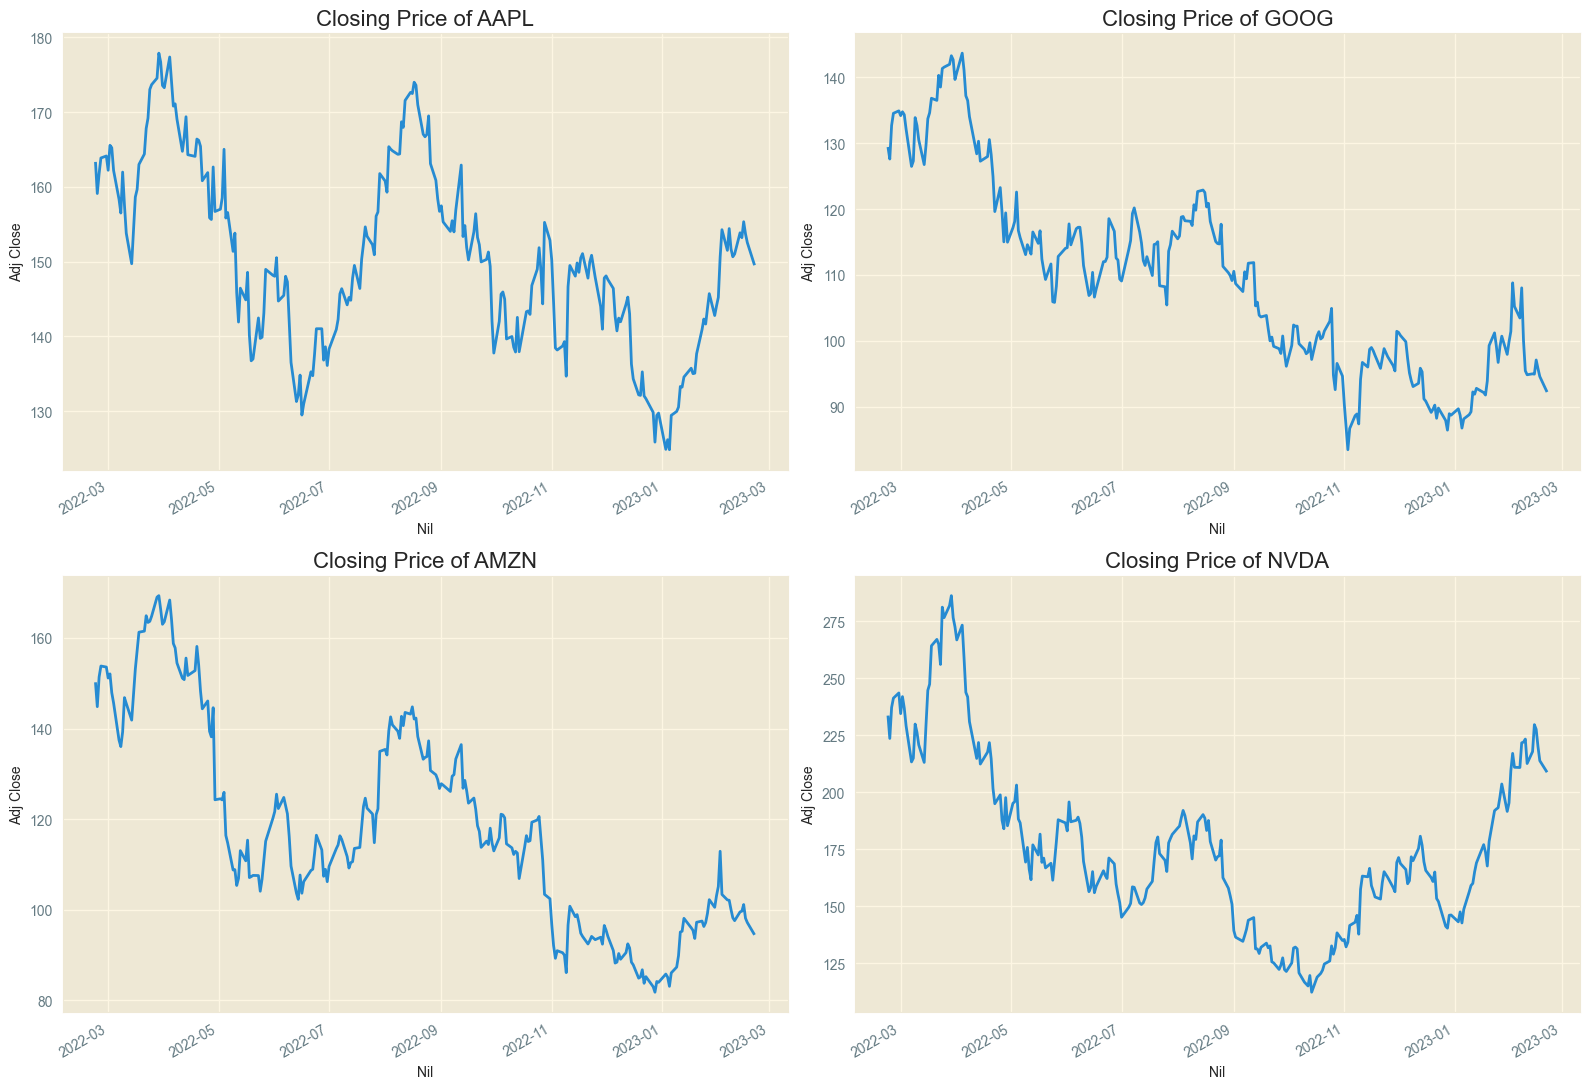

In [6]:
""" Closing price refers to the last price at which the stock is traded during the regular trading day. 
It is the standard benchmark used by investors to get the performance over time. """

# lets determine the figure size by the following figsize using plot function 

plt.figure(figsize=(16,11))

# lets plot the closing price of all tech stocks i.e. APPL, AMZN, GOOG, NVDA 

plt.subplots_adjust(top=1.25,bottom=1.2)

for i,company in enumerate(company_list,1):
    plt.style.use('Solarize_Light2')
    plt.subplot(2,2,i)
    company['Adj Close'].plot()   # plotting parameter of the graph i.e. x axis and y axis
    plt.ylabel('Adj Close')
    plt.xlabel('Nil')
    plt.title(f'Closing Price of {techno_list[i-1]}')   # the list we had already defined containing the tech stocks 
              
plt.tight_layout()
              


## 4. Company's Volume Data:

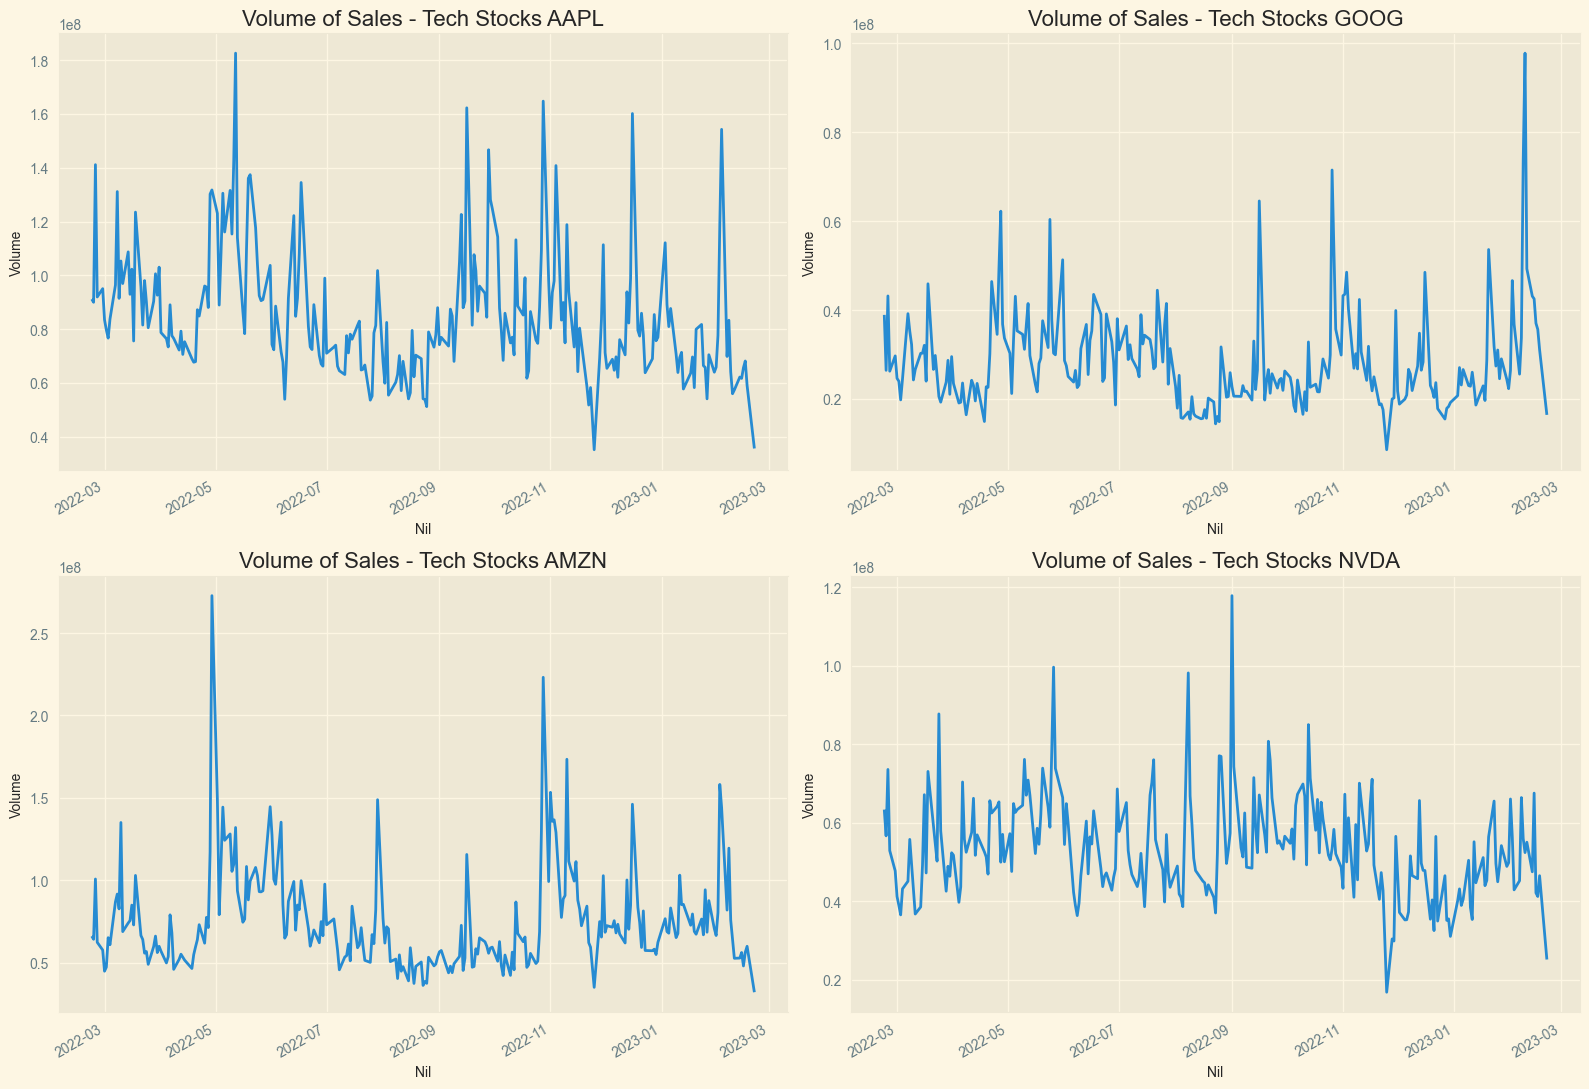

In [7]:
"""Volume of sales in stock market refers to number of security shares that are traded on daily basis in specified time"""

plt.figure(figsize=(16,11))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i,company in enumerate(company_list,1):
    plt.style.use('Solarize_Light2')
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('Nil')
    plt.title(f'Volume of Sales - Tech Stocks {techno_list[i-1]}')   
plt.tight_layout()    

## 5. Moving average is used to keep an update on average stock price

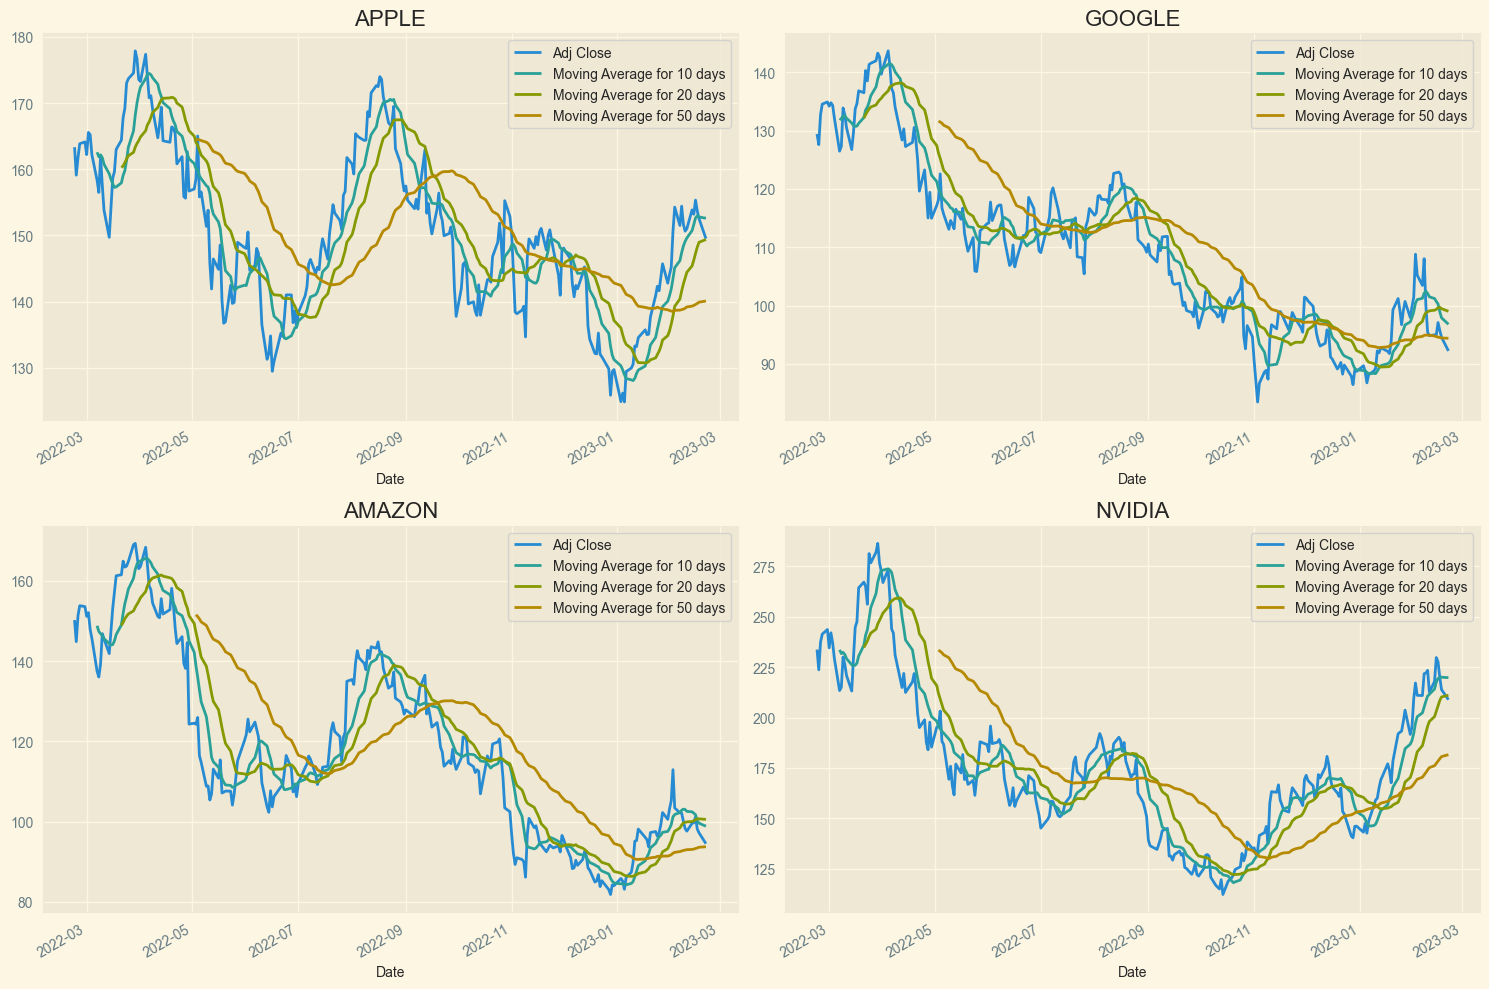

In [8]:
#Its essential to have moving average, as it gives us a regular update on average of stock price

mov_avg_day=[10,20,50]   # list that contains number of days as 10,20 and 50

for move in mov_avg_day:
    for company in company_list:
        column_name=f"Moving Average for {move} days"
        company[column_name]=company['Adj Close'].rolling(move).mean()

fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

AMZN[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

NVDA[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NVIDIA')

fig.tight_layout()


## 6. Daily return of the stock on average

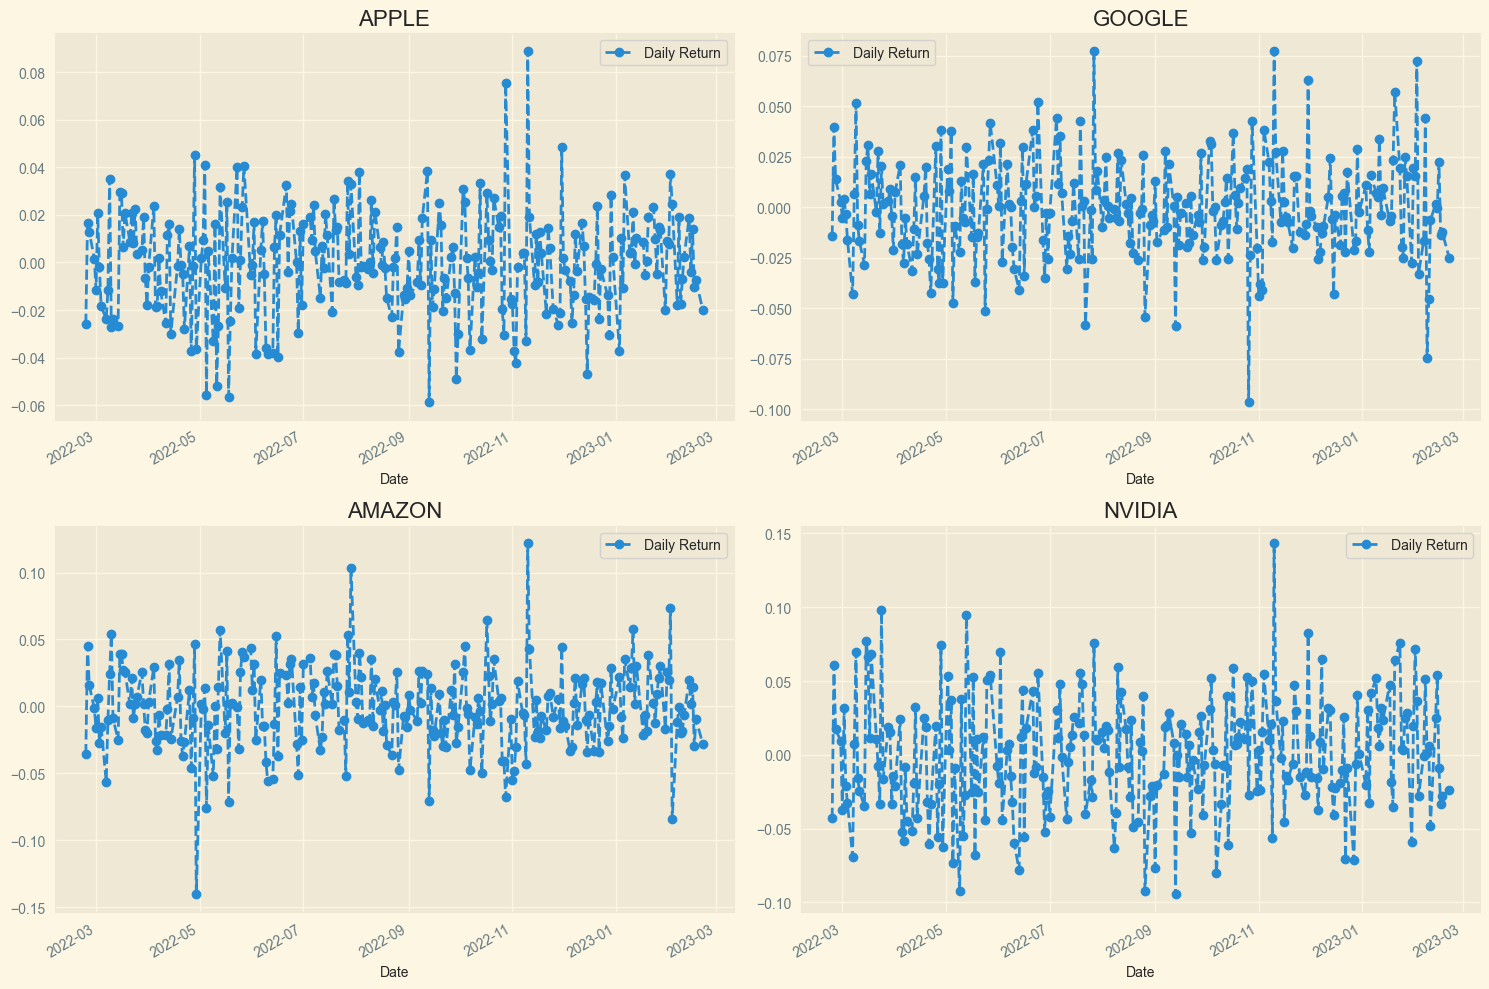

In [9]:
# this returns return on the daily basis of stock on average

for company in company_list:
    company['Daily Return']=company['Adj Close'].pct_change()
    
# pct_change returns dataframe with percentage difference of each row and column

fig, axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Daily Return']].plot(ax=axes[0,0],legend=True,linestyle='--',marker='o')
axes[0,0].set_title('APPLE')

GOOG[['Daily Return']].plot(ax=axes[0,1],legend=True,linestyle='--',marker='o')
axes[0,1].set_title('GOOGLE')

AMZN[['Daily Return']].plot(ax=axes[1,0],legend=True,linestyle='--',marker='o')
axes[1,0].set_title('AMAZON')

NVDA[['Daily Return']].plot(ax=axes[1,1],legend=True,linestyle='--',marker='o')
axes[1,1].set_title('NVIDIA')

fig.tight_layout()

## 7. Overall average daily return using Histogram

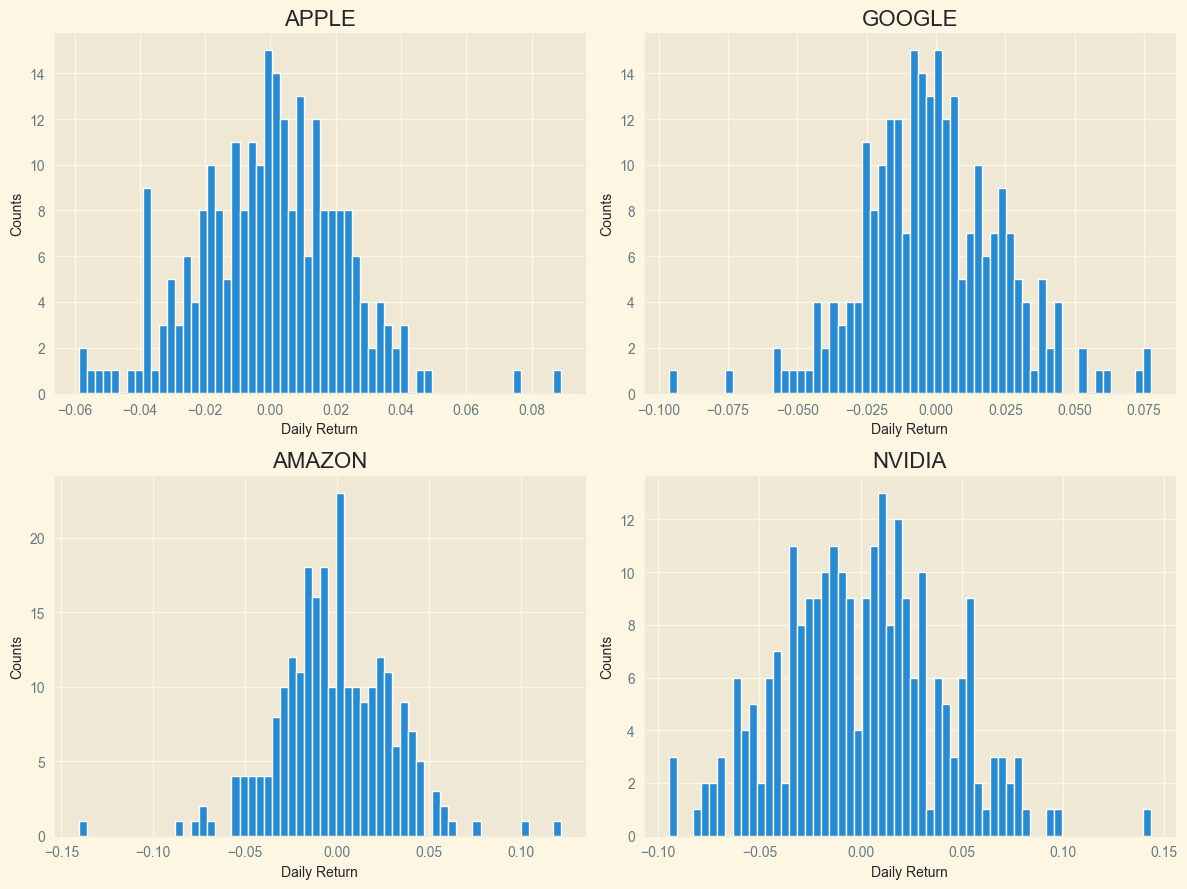

In [10]:
i=1
plt.figure(figsize=(12,9))
for count,company in enumerate(company_list,1):  # enumeration starting from 1 
    plt.subplot(2,2,count)
    company['Daily Return'].hist(bins=60)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[count-1]}')

plt.tight_layout()    


## 8. Correlation between different stocks closing prices

In [11]:
# Correlation is a statistical measure that expresses the extent to which two variables are linearly related 
# i.e. they change together at constant rate

""" Lets create a dataframe that contains closing prices for the tech stocks i.e. that contains closing prices for 
AAPL,GOOG,AMZN,NVDA """

#import data as pdr, in the beginning of the program
# start and end which we initialized with datetime module where end=datetime.now() and start=datetime(end.year-1,end.month,end.day)
df2=pdr.get_data_yahoo(techno_list,start=start,end=end)['Adj Close']

#now we return the above dataframe with percetage difference in terms of row and column using pct_change()

df2_pct=df2.pct_change()
df2_pct.head(8)


[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,NVDA
Date,,,,
2022-02-22,NaN,NaN,NaN,NaN
2022-02-23,-0.025864,-0.035756,-0.014045,-0.042882
2022-02-24,0.016680,0.045095,0.039883,0.060794
2022-02-25,0.012965,0.016058,0.013914,0.017223
2022-02-28,0.001638,-0.001466,0.002762,0.009438
2022-03-01,-0.011628,-0.015766,-0.005360,-0.037236
2022-03-02,0.020588,0.006024,0.004349,0.031824
2022-03-03,-0.001981,-0.027320,-0.003291,-0.020892


<Figure size 200x100 with 0 Axes>

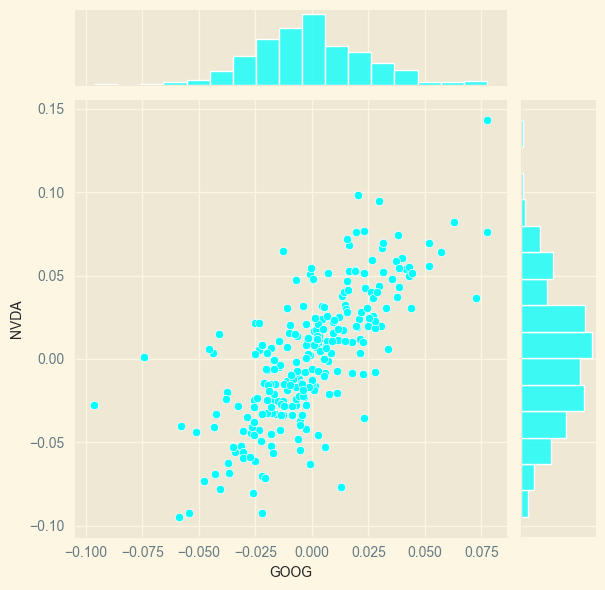

In [12]:
# To check correlation of two stocks, lets compare their daily percentage return
# we will use seaborn library to plot the daily percentage return of the two stocks

# Below we are comparing GOOGLE with NVIDIA
plt.figure(figsize=(2,1))
sns.jointplot(x='GOOG',y='NVDA',data=df2_pct,kind='scatter',color='cyan')

<Figure size 200x100 with 0 Axes>

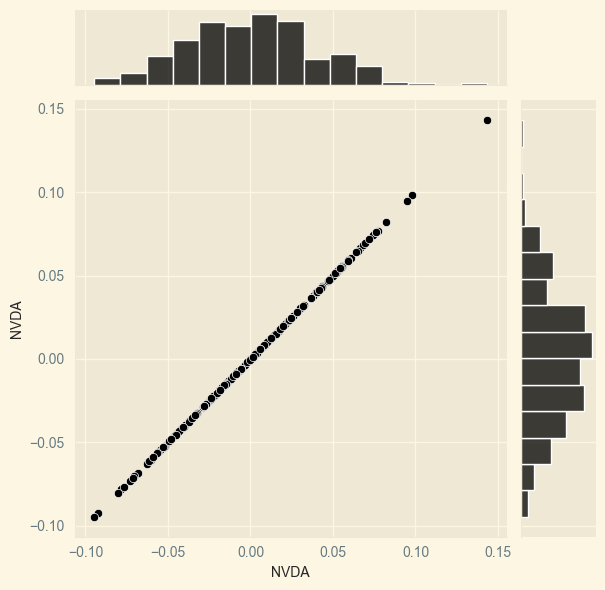

In [13]:
# For our purpose, we can compare one stock with itself to determine the perfect correlation
plt.figure(figsize=(2,1))
sns.jointplot(x='NVDA',y='NVDA',data=df2_pct,kind='scatter',color='black')

NameError: name 'b' is not defined

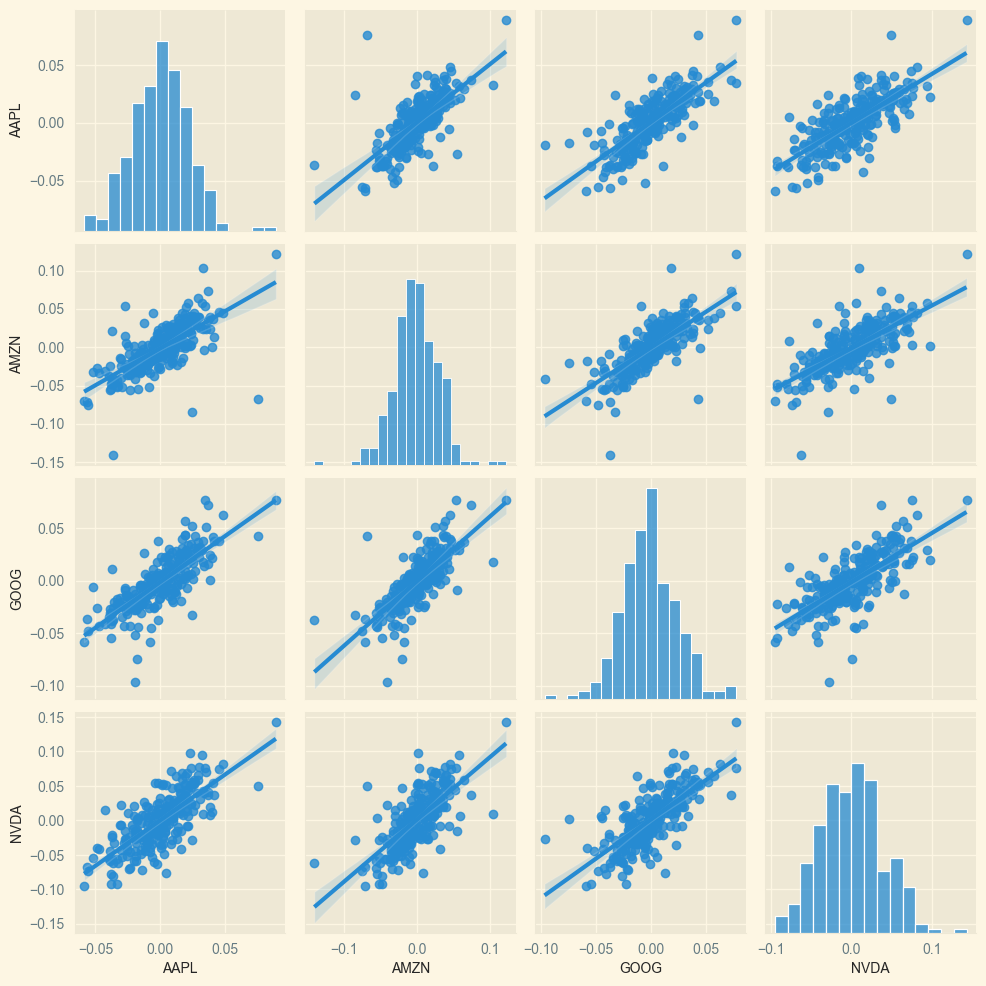

In [14]:
sns.pairplot(df2_pct,kind='reg')  
b# pairplot with regression as the kind, it contains pairplot of df2_pct dataframe for all tech stocks

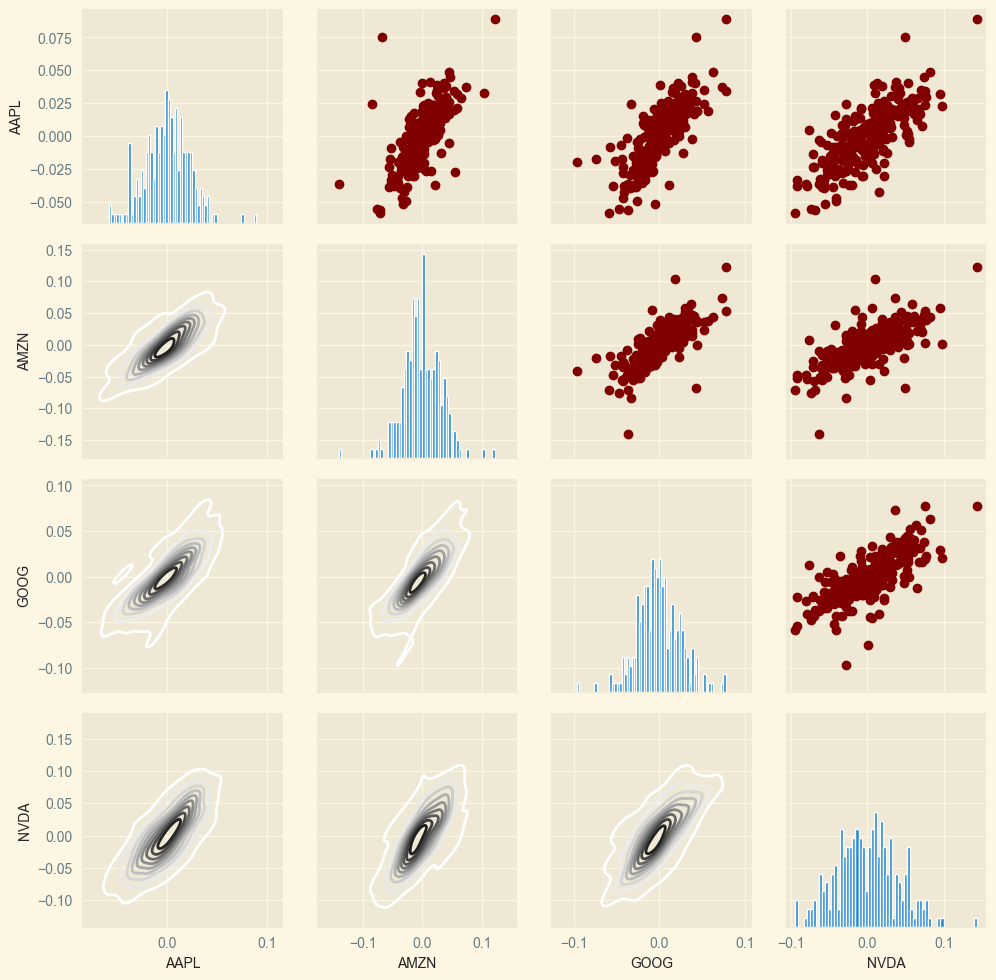

In [15]:
# performing on df2_pct that contains dataframe with percentage difference
# map_upper is used to format plots under the upper right triangle 
# map_lower is used to format plots under the lower right triangle
# map_diag is used to format plots that fall on left diagonal

df2_fig=sns.PairGrid(df2_pct.dropna())
df2_fig.map_upper(plt.scatter,color='maroon')
df2_fig.map_lower(sns.kdeplot,cmap='binary')
df2_fig.map_diag(plt.hist,bins=60)

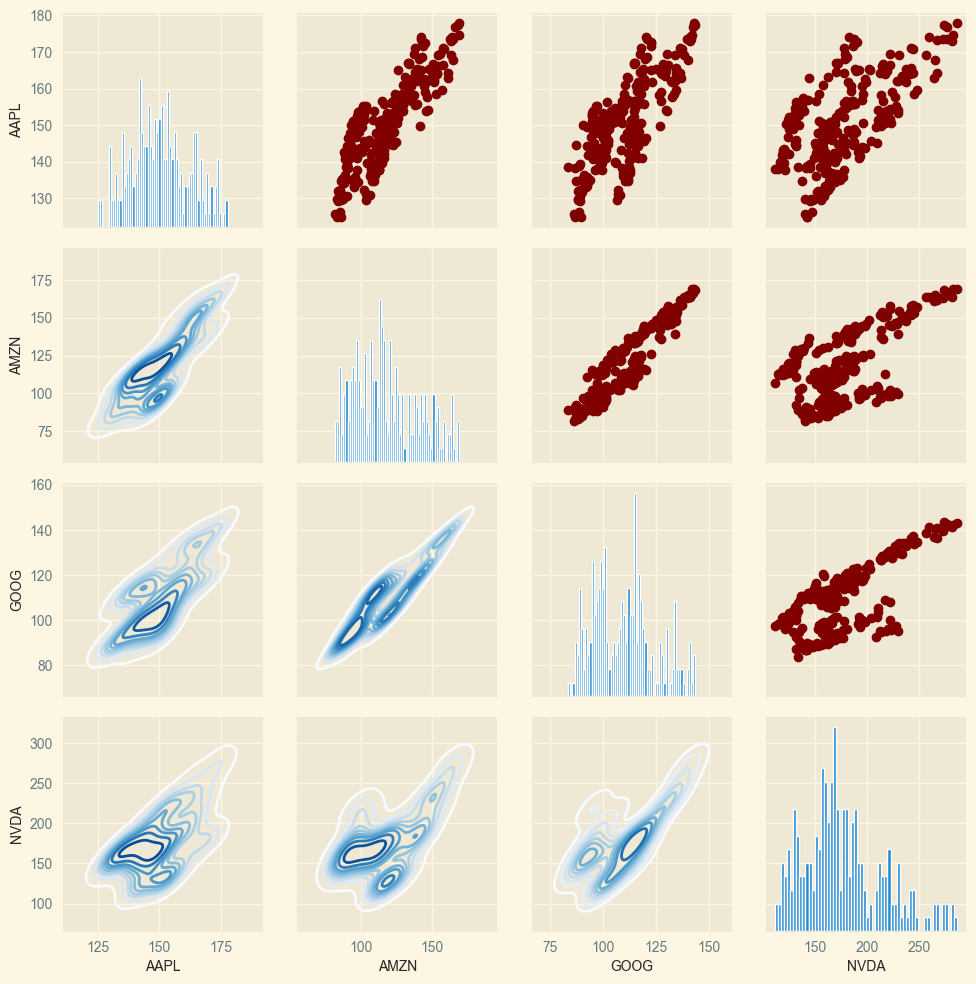

In [16]:
# performing on df2 that contains only dataframe related the closing prices of tech stocks

df2_fig_only=sns.PairGrid(df2)
df2_fig_only.map_upper(plt.scatter,color='maroon')
df2_fig_only.map_lower(sns.kdeplot,cmap='Blues')
df2_fig_only.map_diag(plt.hist,bins=60)

Text(0.5, 1.0, 'Correlation of Stock Closing Price')

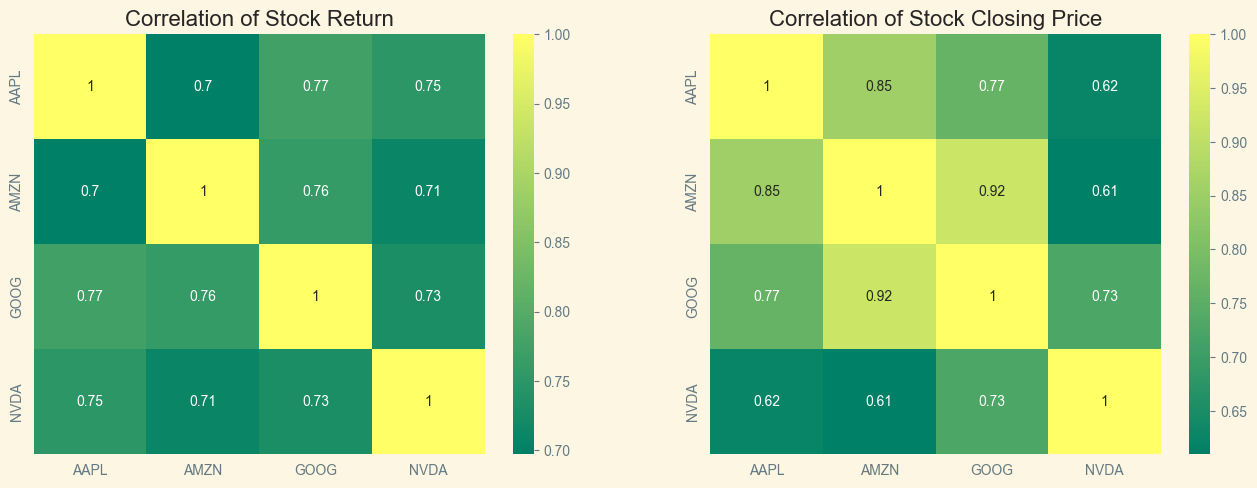

In [17]:
# With the help of Correlation plot we can achieve correlation between stock daily return values

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.heatmap(df2_pct.corr(),annot=True,cmap='summer')  #dataframe containing stock return
plt.title('Correlation of Stock Return')

plt.subplot(2,2,2)
sns.heatmap(df2.corr(),annot=True,cmap='summer')  # dataframe containing closing price 
plt.title('Correlation of Stock Closing Price')


## 9. Analyzing the value, that a person can risk by investing in a particular stock

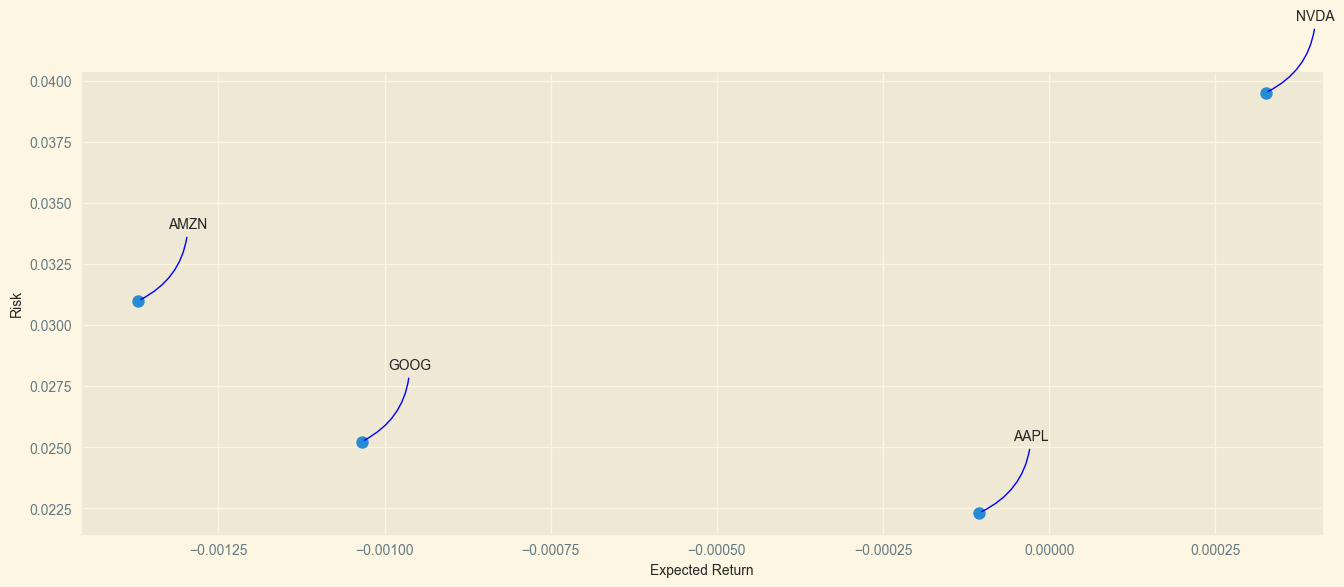

In [18]:
# we will take another dataframe 'df3' which consists of cleaned dataframe containing stock returns
# we will take a variable 'alpha' which has value from the formula 3.14159*20, 
# with scatterplot we will plot mean,standard deviation and area itself
# xlabel is Expected Return 
# ylabel is Risk
# we have taken a iterable 'label','x','y' and iterating into zip of df3 columns,mean and standard deviation
# now with pyplot we will provide description (also called to annotate)
# annotation contains parametesr count,xy,xytext,textcoords,ha,va,arrowprops,arrowstyle,connectionstyle. They are all explained below:
"""count denotes iterable variable, xy denotes (x,y) to annotate, xytext denotes text to be placed at (x,y), 
   textcoords determines coordinate system, ha is horizontal alignment and va is vertical alignment,
   arrowprops is properties used to draw fancy arrowpatch, arrowstyle is used to draw arrow style,
   connectionstyle is used to draw connection style"""


df3=df2_pct.dropna()
area=np.pi*20
alpha=area
plt.figure(figsize=(16,6))
plt.scatter(df3.mean(),df3.std(),alpha)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for count,x,y in zip(df3.columns,df3.mean(),df3.std()):
    plt.annotate(count,xy=(x,y),xytext=(50,50),textcoords='offset points',ha='right',va='bottom',arrowprops=dict(arrowstyle='-',color='blue',connectionstyle='arc3,rad=-0.3'))

## 10. Predicting the closing price of AAPL (APPLE)

In [19]:
df4=pdr.get_data_yahoo('AAPL',start='2022-02-21',end=datetime.now())
df4

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-22,164.979996,166.690002,162.149994,164.320007,163.330597,91162800
2022-02-23,165.539993,166.149994,159.750000,160.070007,159.106201,90009200
2022-02-24,152.580002,162.850006,152.000000,162.740005,161.760101,141147500
2022-02-25,163.839996,165.119995,160.869995,164.850006,163.857407,91974200
2022-02-28,163.059998,165.419998,162.429993,165.119995,164.125763,95056600
...,...,...,...,...,...,...
2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65669300
2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900


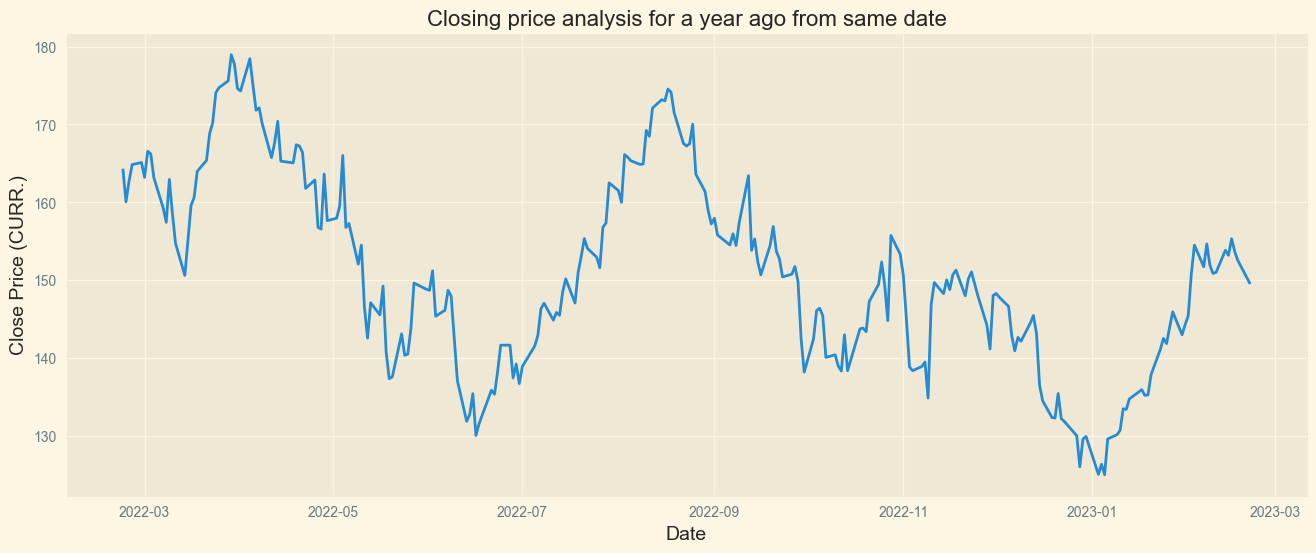

In [20]:
plt.figure(figsize=(16,6))
plt.title('Closing price analysis for a year ago from same date')
plt.plot(df4['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close Price (CURR.)',fontsize=14)
plt.show()

In [21]:
data=df4.filter(['Close'])
dataset=data.values
length_train_data=int(np.ceil(len(dataset)*0.95))
print(length_train_data)   # prints the length of the train data

239


# TRAINING PHASE

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)  # dataset=data.values, data=df4.filter(['Close'])
scaled_data

array([[7.28587381e-01],
       [6.49796146e-01],
       [6.99295547e-01],
       [7.38413089e-01],
       [7.43418446e-01],
       [7.07823381e-01],
       [7.70114816e-01],
       [7.63996874e-01],
       [7.07267230e-01],
       [6.35520949e-01],
       [6.01038186e-01],
       [7.03188603e-01],
       [6.21060463e-01],
       [5.50797062e-01],
       [4.74601292e-01],
       [5.57471155e-01],
       [6.40897168e-01],
       [6.59992433e-01],
       [7.22283867e-01],
       [7.48238797e-01],
       [8.12013395e-01],
       [8.37782752e-01],
       [9.09343743e-01],
       [9.21394054e-01],
       [9.37708565e-01],
       [1.00000000e+00],
       [9.77938409e-01],
       [9.19354741e-01],
       [9.13792950e-01],
       [9.90359581e-01],
       [9.27697285e-01],
       [8.67816026e-01],
       [8.73563106e-01],
       [8.35557866e-01],
       [7.55098179e-01],
       [7.90507954e-01],
       [8.41304946e-01],
       [7.46570062e-01],
       [7.42491717e-01],
       [7.85687604e-01],


In [23]:
l=int(length_train_data)
data_train=scaled_data[0:l,:]
x_train=[]
y_train=[]

for i in range(60,len(data_train)):
    x_train.append(data_train[i-60:i,0])
    y_train.append(data_train[i,0])
    if(i<=61):
        print(x_train)
        print(y_train)

x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


[array([0.72858738, 0.64979615, 0.69929555, 0.73841309, 0.74341845,
       0.70782338, 0.77011482, 0.76399687, 0.70726723, 0.63552095,
       0.60103819, 0.7031886 , 0.62106046, 0.55079706, 0.47460129,
       0.55747115, 0.64089717, 0.65999243, 0.72228387, 0.7482388 ,
       0.81201339, 0.83778275, 0.90934374, 0.92139405, 0.93770857,
       1.        , 0.97793841, 0.91935474, 0.91379295, 0.99035958,
       0.92769729, 0.86781603, 0.87356311, 0.83555787, 0.75509818,
       0.79050795, 0.84130495, 0.74657006, 0.74249172, 0.7856876 ,
       0.78253599, 0.76751935, 0.68168316, 0.70189101, 0.58917316,
       0.58490925, 0.71598064, 0.60493124, 0.6106786 , 0.63885785,
       0.76010382, 0.58861701, 0.59807186, 0.50129766, 0.54671843,
       0.39822023, 0.32517608, 0.4095291 , 0.38042256, 0.44901751])]
[0.2929182004306914]
[array([0.72858738, 0.64979615, 0.69929555, 0.73841309, 0.74341845,
       0.70782338, 0.77011482, 0.76399687, 0.70726723, 0.63552095,
       0.60103819, 0.7031886 , 0.6210

# LSTM PREDICTION

In [25]:
from keras.models import Sequential
from keras.layers import Dense,LSTM 

# Building the Long Short Term Memory Model, RNN 
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model

model.compile(optimizer='adam',loss='mean_squared_error')

# train the model 

model.fit(x_train,y_train,batch_size=1,epochs=1)


179/179 [==============================] - 4s 11ms/step - loss: 0.0209


In [29]:
# creating a testing dataset 
# creating x_test and y_test datasets

test_data=scaled_data[length_train_data-60:,:] 
x_test=[]
y_test=dataset[length_train_data:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
# converting the data into numpy array 
x_test=np.array(x_test)

# reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# model predicted price values 

predict_1=model.predict(x_test)
predict_1=scaler.inverse_transform(predict_1)

RMS=np.sqrt(((predict_1-y_test)**2))   b
RMS  # root mean square

1/1 [==============================] - 0s 21ms/step


array([[11.78707886],
       [ 8.04698181],
       [10.13555908],
       [ 6.55455017],
       [ 4.94876099],
       [ 4.83317566],
       [ 7.59927368],
       [ 6.78314209],
       [ 8.76457214],
       [ 6.87263489],
       [ 5.52337646],
       [ 2.44898987]])

C:\Users\rahul\AppData\Local\Temp\ipykernel_25052\4140662793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['Predictions']=predict_1


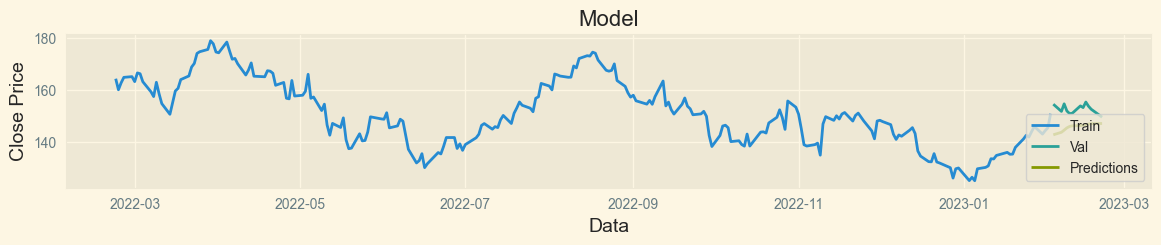

In [32]:
# plot the data

train=data[:length_train_data]
dataset2=data[length_train_data:]
dataset2['Predictions']=predict_1

# visualization of data

plt.figure(figsize=(14,2))
plt.title('Model')
plt.xlabel('Data',fontsize=14)
plt.ylabel('Close Price',fontsize=14)
plt.plot(train['Close'])
plt.plot (valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [33]:
dataset2

,Close,Predictions
Date,,
2023-02-03,154.500000,142.712921
2023-02-06,151.729996,143.683014
2023-02-07,154.649994,144.514435
2023-02-08,151.919998,145.365448
2023-02-09,150.869995,145.921234
2023-02-10,151.009995,146.176819
2023-02-13,153.850006,146.250732
2023-02-14,153.199997,146.416855
2023-02-15,155.330002,146.565430


In [ ]:
# Thus we have predicted close stock price of AAPL (APPLE) and predicted future stock behaviour.